### Importation des librairies

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

import gzip
import csv
import json

### Lecture du fichier

In [4]:
listings_details = pd.read_csv("/Users/Johanna/Documents/SIMPLON/PROJET/09. Airbnb Paris Aout 2019/source/listings_details.csv", index_col= "id", low_memory=False)
calendar = pd.read_csv("/Users/Johanna/Documents/SIMPLON/PROJET/09. Airbnb Paris Aout 2019/source/calendar.csv", index_col= "listing_id", low_memory=False)

In [5]:
for col in listings_details.columns:
    print(col)

listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_night

### Selection de colonnes

In [6]:
for col in listings_details.columns:
    print(listings_details[[col[:]]])

                                    listing_url
id                                             
3109          https://www.airbnb.com/rooms/3109
5396          https://www.airbnb.com/rooms/5396
7397          https://www.airbnb.com/rooms/7397
7964          https://www.airbnb.com/rooms/7964
8522          https://www.airbnb.com/rooms/8522
...                                         ...
36557641  https://www.airbnb.com/rooms/36557641
36558170  https://www.airbnb.com/rooms/36558170
36558323  https://www.airbnb.com/rooms/36558323
36560192  https://www.airbnb.com/rooms/36560192
36561242  https://www.airbnb.com/rooms/36561242

[64293 rows x 1 columns]
               scrape_id
id                      
3109      20190709213457
5396      20190709213457
7397      20190709213457
7964      20190709213457
8522      20190709213457
...                  ...
36557641  20190709213457
36558170  20190709213457
36558323  20190709213457
36560192  20190709213457
36561242  20190709213457

[64293 rows x 1 columns]

[64293 rows x 1 columns]
         host_is_superhost
id                        
3109                     f
5396                     f
7397                     f
7964                     f
8522                     f
...                    ...
36557641                 f
36558170                 f
36558323                 f
36560192                 f
36561242                 f

[64293 rows x 1 columns]
                                         host_thumbnail_url
id                                                         
3109      https://a0.muscache.com/im/users/3631/profile_...
5396      https://a0.muscache.com/im/users/7903/profile_...
7397      https://a0.muscache.com/im/pictures/58f00c4d-f...
7964      https://a0.muscache.com/im/users/22155/profile...
8522      https://a0.muscache.com/im/users/25435/profile...
...                                                     ...
36557641  https://a0.muscache.com/im/pictures/user/5b0c9...
36558170  https://a0.muscache.com/im/pictures/user/44bd6..

                                                  amenities
id                                                         
3109      {Internet,Wifi,Kitchen,"Paid parking off premi...
5396      {TV,"Cable TV",Internet,Wifi,Kitchen,Heating,W...
7397      {TV,"Cable TV",Internet,Wifi,Kitchen,"Paid par...
7964      {TV,"Cable TV",Internet,Wifi,Kitchen,"Buzzer/w...
8522      {Internet,Wifi,Kitchen,"Washer / Dryer",Elevat...
...                                                     ...
36557641  {TV,Internet,Wifi,Kitchen,Elevator,"Indoor fir...
36558170  {TV,Kitchen,"Smoking allowed","Pets allowed",B...
36558323  {TV,Wifi,Breakfast,Shampoo,"Private living room"}
36560192  {Kitchen,Elevator,"Smoke detector",Essentials,...
36561242  {TV,Wifi,Kitchen,"Pets allowed",Breakfast,Heat...

[64293 rows x 1 columns]
          square_feet
id                   
3109              NaN
5396              NaN
7397              NaN
7964              0.0
8522              NaN
...               ...
36557641          

          calculated_host_listings_count_private_rooms
id                                                    
3109                                                 0
5396                                                 0
7397                                                 0
7964                                                 0
8522                                                 0
...                                                ...
36557641                                             0
36558170                                             0
36558323                                             1
36560192                                             0
36561242                                             0

[64293 rows x 1 columns]
          calculated_host_listings_count_shared_rooms
id                                                   
3109                                                0
5396                                                0
7397                                       

In [7]:
paris_listing = listings_details[['host_id','host_name', 'host_since', 'host_location', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_neighbourhood','host_listings_count','host_total_listings_count','street', 'neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','city','zipcode','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','cancellation_policy','calculated_host_listings_count','reviews_per_month']]
paris_listing.head()

,host_id,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
3109,3631,Anne,2008-10-14,"Paris, Île-de-France, France",100%,NaN,f,Alésia,1.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1,0.26
5396,7903,Borzou,2009-02-14,"Istanbul, İstanbul, Turkey",100%,NaN,f,Saint-Paul - Ile Saint-Louis,1.0,1.0,...,91.0,9.0,8.0,9.0,9.0,10.0,9.0,strict_14_with_grace_period,1,1.47
7397,2626,Franck,2008-08-30,"Paris, Île-de-France, France",100%,NaN,f,Le Marais,2.0,2.0,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,moderate,1,2.47
7964,22155,Anaïs,2009-06-18,"Paris, Île-de-France, France",NaN,NaN,f,Gare du Nord - Gare de I'Est,0.0,0.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict_14_with_grace_period,1,0.05
8522,25435,Adrien,2009-07-13,"Paris, Ile-de-France, France",NaN,NaN,f,Père Lachaise - Ménilmontant,1.0,1.0,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,moderate,1,0.01


In [8]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64293 entries, 3109 to 36561242
Data columns (total 56 columns):
host_id                           64293 non-null int64
host_name                         64229 non-null object
host_since                        64229 non-null object
host_location                     64059 non-null object
host_response_rate                39265 non-null object
host_acceptance_rate              0 non-null float64
host_is_superhost                 64229 non-null object
host_neighbourhood                54865 non-null object
host_listings_count               64229 non-null float64
host_total_listings_count         64229 non-null float64
street                            64293 non-null object
neighbourhood                     64212 non-null object
neighbourhood_cleansed            64293 non-null object
neighbourhood_group_cleansed      0 non-null float64
city                              64278 non-null object
zipcode                           63593 non-null o

### Convertion des données dans les bons formats

#### Les valeurs en dollars => valeurs numériques

In [9]:
# Suppression des valeurs nulls: 'host_acceptance_rate', 'neighbourhood_group_cleansed'
paris_listing = listings_details[['host_id','host_name', 'host_since', 'host_location', 'host_response_rate', 'host_is_superhost','host_neighbourhood','host_listings_count','host_total_listings_count','street', 'neighbourhood','neighbourhood_cleansed','city','zipcode','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','cancellation_policy','calculated_host_listings_count','reviews_per_month']]

In [10]:
paris_dollar = listings_details [['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']]

In [11]:
paris_dollar.head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
id,,,,,,
3109,$60.00,$490.00,NaN,$0.00,$50.00,$0.00
5396,$115.00,$600.00,"$2,000.00",$0.00,$36.00,$0.00
7397,$115.00,NaN,"$2,200.00",$200.00,$50.00,$10.00
7964,$130.00,NaN,NaN,$500.00,$60.00,$20.00
8522,$90.00,$600.00,NaN,NaN,NaN,$0.00


In [12]:
# Pour remplacer juste une valeur - supprimer le $:
for col in paris_dollar.columns.values.tolist():
    listings_details[col] = listings_details[col].str.replace('$', '')
    listings_details[col] = listings_details[col].str.replace(',', '')
    listings_details[col] = pd.to_numeric(listings_details[col])

In [13]:
listings_details.price.head()

id
3109     60.0
5396    115.0
7397    115.0
7964    130.0
8522     90.0
Name: price, dtype: float64

In [14]:
listings_details['host_since'] = pd.to_datetime(listings_details['host_since'])

In [15]:
listings_details['host_response_rate'] = pd.to_numeric(listings_details['host_response_rate'].str.strip('%'))

In [16]:
for col in listings_details.columns.values.tolist():
    if listings_details[col].dtypes == 'int64':
        listings_details[col] = listings_details[col].astype(np.int8)

In [17]:
for col in listings_details.columns.values.tolist():
    if listings_details[col].dtypes == 'float64':
        listings_details[col] = listings_details[col].astype(np.float16)

In [18]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64293 entries, 3109 to 36561242
Data columns (total 54 columns):
host_id                           64293 non-null int64
host_name                         64229 non-null object
host_since                        64229 non-null object
host_location                     64059 non-null object
host_response_rate                39265 non-null object
host_is_superhost                 64229 non-null object
host_neighbourhood                54865 non-null object
host_listings_count               64229 non-null float64
host_total_listings_count         64229 non-null float64
street                            64293 non-null object
neighbourhood                     64212 non-null object
neighbourhood_cleansed            64293 non-null object
city                              64278 non-null object
zipcode                           63593 non-null object
latitude                          64293 non-null float64
longitude                         64293 non

### Détection des valeurs NA ou non NA

In [20]:
# Valeurs Null par colonne:
null_columns=paris_dollar.columns[paris_dollar.isnull().any()]
paris_dollar[null_columns].isnull().sum()

weekly_price        53899
monthly_price       57694
security_deposit    19852
cleaning_fee        17191
dtype: int64

In [21]:
# Valeurs Null par colonne:
null_columns_paris=paris_listing.columns[paris_listing.isnull().any()]
paris_listing[null_columns_paris].isnull().sum()

host_name                         64
host_since                        64
host_location                    234
host_response_rate             25028
host_is_superhost                 64
host_neighbourhood              9428
host_listings_count               64
host_total_listings_count         64
neighbourhood                     81
city                              15
zipcode                          700
bathrooms                         61
bedrooms                          46
beds                             466
square_feet                    63119
weekly_price                   53899
monthly_price                  57694
security_deposit               19852
cleaning_fee                   17191
review_scores_rating           15757
review_scores_accuracy         15810
review_scores_cleanliness      15796
review_scores_checkin          15831
review_scores_communication    15802
review_scores_location         15829
review_scores_value            15830
cancellation_policy                1
r

In [22]:
# Valeurs non Null par colonne:
paris_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64293 entries, 3109 to 36561242
Data columns (total 6 columns):
price               64293 non-null object
weekly_price        10394 non-null object
monthly_price       6599 non-null object
security_deposit    44441 non-null object
cleaning_fee        47102 non-null object
extra_people        64293 non-null object
dtypes: object(6)
memory usage: 3.4+ MB


In [23]:
# Stats desc pr les vars num ? 
paris_listing.describe(exclude=['O'])

,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,6.429300e+04,64229.000000,64229.000000,64293.000000,64293.000000,64293.000000,64232.000000,64247.000000,63827.000000,1174.000000,...,64293.000000,48536.000000,48483.000000,48497.000000,48462.000000,48491.000000,48464.000000,48463.000000,64293.000000,49684.000000
mean,6.648611e+07,13.922963,13.922963,48.864109,2.345350,3.054516,1.118306,1.089280,1.666693,403.903748,...,18.749195,92.971938,9.595178,9.208590,9.680451,9.717948,9.653372,9.269236,7.814210,1.210193
std,7.693518e+07,90.750127,90.750127,0.018483,0.033776,1.549560,0.645016,0.983599,1.141160,446.358851,...,38.751261,8.307887,0.787593,1.065818,0.734938,0.701960,0.685451,0.897254,35.337494,1.459079
min,2.419000e+03,0.000000,0.000000,48.812890,2.219430,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,1.080773e+07,1.000000,1.000000,48.850670,2.323950,2.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.230000
50%,3.266216e+07,1.000000,1.000000,48.865260,2.348330,2.000000,1.000000,1.000000,1.000000,334.000000,...,5.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.700000
75%,9.359166e+07,2.000000,2.000000,48.879230,2.370900,4.000000,1.000000,1.000000,2.000000,592.000000,...,19.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.640000
max,2.748233e+08,1426.000000,1426.000000,48.905210,2.471890,17.000000,50.000000,50.000000,50.000000,6458.000000,...,809.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,323.000000,31.150000


In [24]:
# Stats desc pr les vars non-num ? 
paris_listing.describe(include=['O'])

,host_name,host_since,host_location,host_response_rate,host_is_superhost,host_neighbourhood,street,neighbourhood,neighbourhood_cleansed,city,...,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,cancellation_policy
count,64229,64229,64059,39265,64229,54865,64293,64212,64293,64278,...,64293,64293,10394,6599,44441,47102,64293,64293,64293,64292
unique,10405,3334,2145,83,2,269,273,63,20,148,...,56432,688,726,777,523,199,107,84,1,6
top,Marie,2016-06-06,"Paris, Île-de-France, France",100%,f,Montmartre,"Paris, Île-de-France, France",XVIII Arrondissement,Buttes-Montmartre,Paris,...,{},$80.00,$500.00,"$2,000.00",$0.00,$30.00,$0.00,today,t,flexible
freq,711,368,47029,26292,56276,3630,58661,3767,7276,61358,...,181,3197,688,323,9131,5336,46437,12276,64293,22644


### Lecture des valeurs d'exception

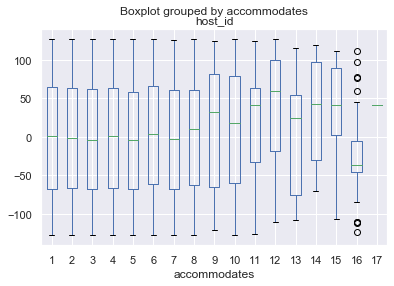

In [25]:
listings_details.boxplot(column='host_id',by='accommodates')

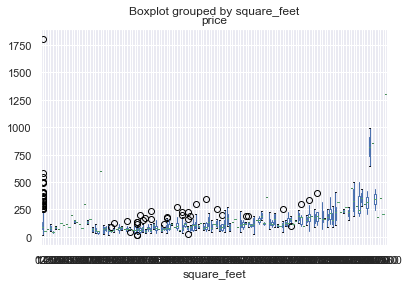

In [26]:
listings_details.boxplot(column='price',by='square_feet')

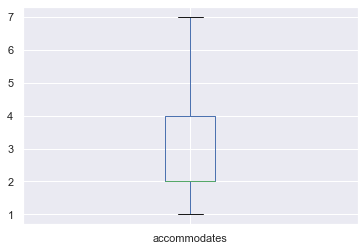

In [27]:
listings_details.accommodates.plot.box(grid='True', sym="")

In [28]:
acc_out = (listings_details.accommodates > 7)

In [29]:
p_accout = listings_details[acc_out]

In [30]:
p_accout.accommodates.count()

1069

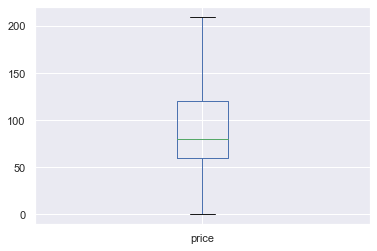

In [31]:
listings_details.price.plot.box(grid='True', sym="")

In [32]:
paris_wto = (listings_details.price < 210)

In [33]:
pwto = listings_details[paris_wto]

In [34]:
pwto.price.count()

58535

### Question 1 : afficher un visuel de quartier avec les tarifs moyens en fonction du nombre de personnes (accomodate)

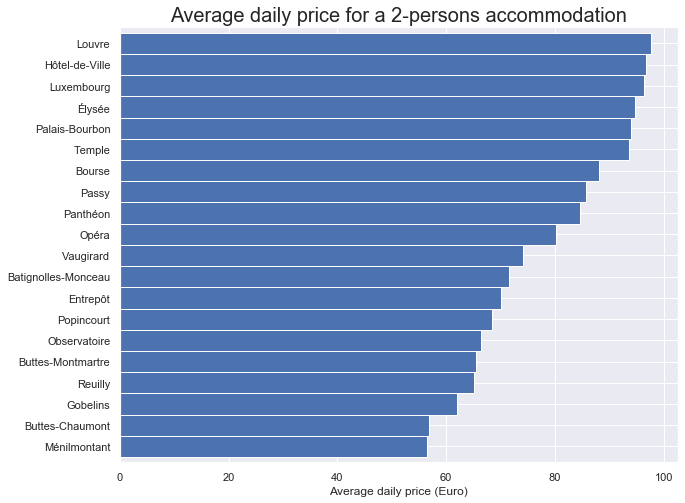

In [35]:
feq = pwto[pwto['accommodates']==2]
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

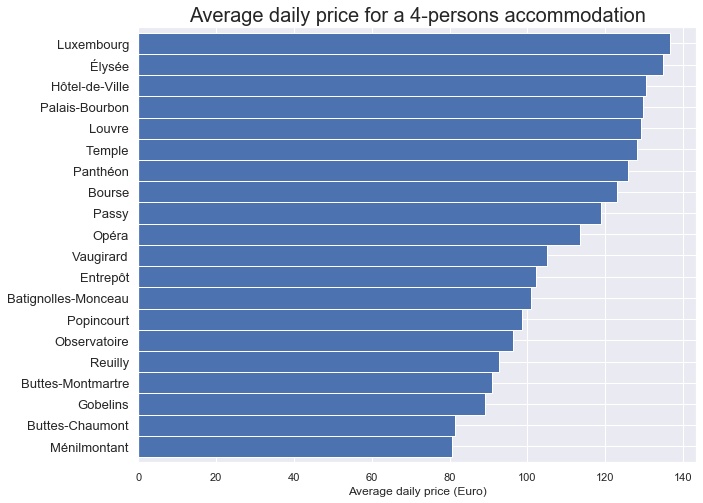

In [46]:
feq = pwto[pwto['accommodates']==4]
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for a 4-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

### Map on the average daily price per neighoudhood

In [38]:
lats2018 = listings_details['latitude'].tolist()
lons2018 = listings_details['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[48.8534, 2.3488], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

### Types de locations

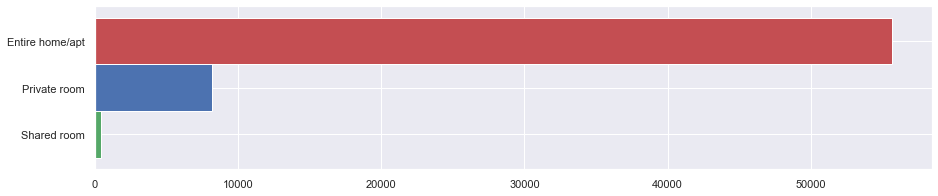

In [39]:
freq = listings_details['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

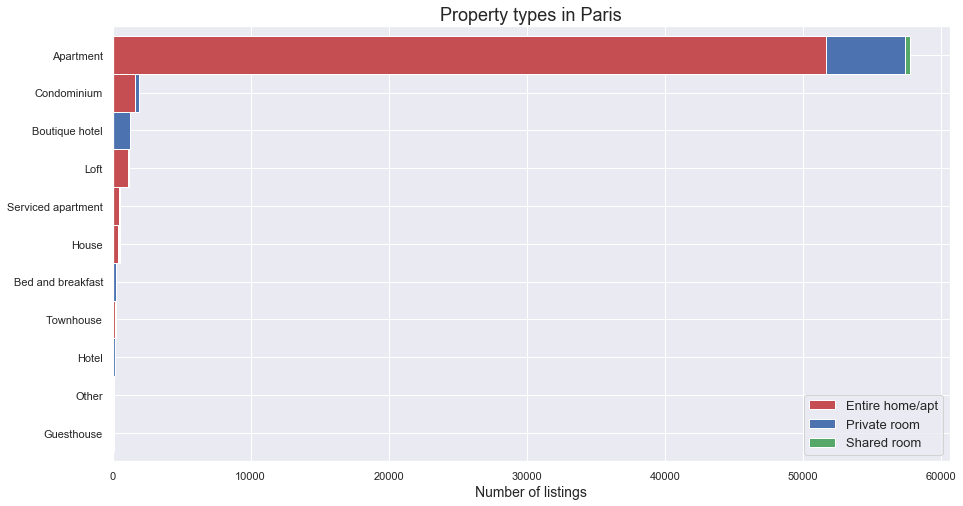

In [40]:
prop = listings_details.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Paris', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()



### Accommodates (number of people)

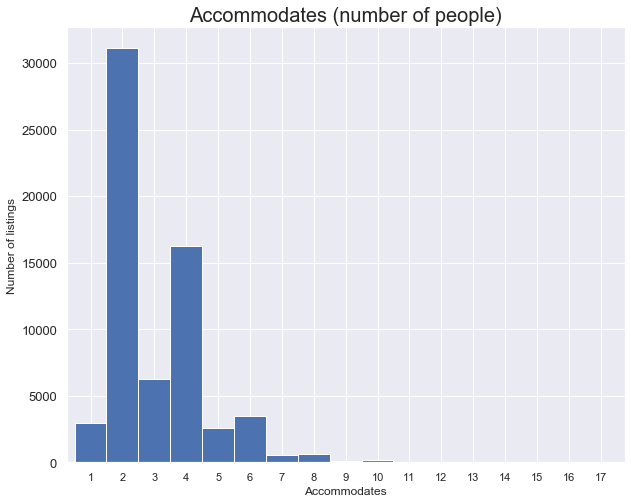

In [41]:
feq=listings_details['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

### Map on the average daily price per neighoudhood

In [42]:
paris = gpd.read_file("/Users/Johanna/Documents/SIMPLON/PROJET/09. Airbnb Paris Aout 2019/source/neighbourhoods.geojson")

In [47]:
feq = pd.DataFrame([feq])

In [48]:
feq = feq.transpose()

In [50]:
paris = pd.merge(paris, feq, on='neighbourhood', how='left')
paris.rename(columns={'price': 'average_price'}, inplace=True)
paris.average_price = paris.average_price.round(decimals=0)

KeyError: 'neighbourhood'

In [132]:
map_dict = paris.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

/Applications/anaconda3/envs/Airbnb/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


TypeError: unsupported operand type(s) for -: 'dict' and 'dict'

In [135]:
map3 = folium.Map(location=[48.8534, 2.3488], zoom_start=11)
folium.GeoJson(data=paris,
               name='Paris',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

NameError: name 'get_color' is not defined

In [134]:
paris = gpd.read_file("/Users/Johanna/Documents/SIMPLON/PROJET/09. Airbnb Paris Aout 2019/source/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
paris = pd.merge(paris, feq, on='neighbourhoods', how='left')
paris.rename(columns={'price': 'average_price'}, inplace=True)
paris.average_price = paris.average_price.round(decimals=0)

map_dict = paris.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[48.8534, 2.3488], zoom_start=11)
folium.GeoJson(data=adam,
               name='Paris',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3


KeyError: 'neighbourhood'

In [105]:
map3 = folium.Map(location=[48.8534, 2.3488], zoom_start=11)
folium.GeoJson(data=adam,
               name='Paris',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3.save('map3.html')

NameError: name 'get_color' is not defined

In [81]:
paris = gpd.read_file("/Users/Johanna/Documents/SIMPLON/PROJET/09. Airbnb Paris Aout 2019/source/neighbourhoods.geojson")
paris

,neighbourhood,neighbourhood_group,geometry
0,Batignolles-Monceau,None,"(POLYGON ((2.295167 48.873955, 2.29504 48.8737..."
1,Palais-Bourbon,None,"(POLYGON ((2.320903 48.863057, 2.320941 48.863..."
2,Buttes-Chaumont,None,"(POLYGON ((2.389429 48.901218, 2.390136 48.901..."
3,Opéra,None,"(POLYGON ((2.339777 48.882029, 2.339816 48.882..."
4,Entrepôt,None,"(POLYGON ((2.364686 48.884369, 2.364855 48.884..."
5,Gobelins,None,"(POLYGON ((2.374913 48.838009, 2.376983 48.836..."
6,Vaugirard,None,"(POLYGON ((2.299322 48.852174, 2.300884 48.851..."
7,Reuilly,None,"(POLYGON ((2.41388 48.833571, 2.414007 48.8335..."
8,Louvre,None,"(POLYGON ((2.328007 48.869917, 2.329966 48.868..."
9,Luxembourg,None,"(POLYGON ((2.344593 48.854049, 2.344284 48.853..."


### Question 2 : afficher un visuel de quartier avec les meilleurs notes